In [31]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import networkx as nx

In [3]:
data=pandas.read_excel('global_terrorism_database.xlsx')

In [4]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [12]:
print(data['related'])

0                                NaN
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5                                NaN
6                                NaN
7                                NaN
8                                NaN
9                                NaN
10                               NaN
11                               NaN
12                               NaN
13                               NaN
14                               NaN
15                               NaN
16                               NaN
17                               NaN
18                               NaN
19                               NaN
20                               NaN
21                               NaN
22                               NaN
23                               NaN
24                               NaN
25                               NaN
26                               NaN
2

# 1) Histogram of frequency of terrorist attacks in North America vs Decade

In [5]:
decade_north_america=[]
decade_total=[]
decade_labels=[1970,1980,1990,2000,2010]
for i in range(len(data['region_txt'])):
    crime_year=int(data['iyear'][i])
    if data['region_txt'][i]=="North America":
        decade_north_america.append(crime_year)
    decade_total.append(crime_year)

    

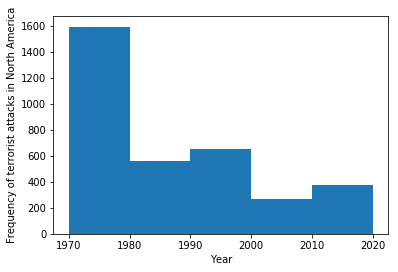

In [6]:
plt.hist(decade_north_america,bins=[1970,1980,1990,2000,2010,2020])
plt.xlabel("Year")
plt.ylabel("Frequency of terrorist attacks in North America")
plt.show()

* In the decade of 1970-80 ,the most number of terrorist attacks happened in North America

# 2) 
## i) Frequency of terrorist attacks from 1970 to 2017 

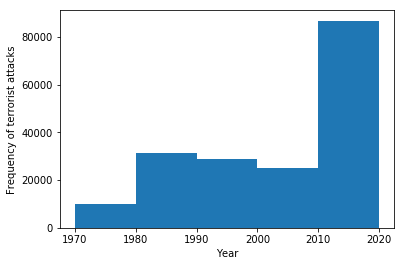

In [7]:
plt.hist(decade_total,bins=[1970,1980,1990,2000,2010,2020])
plt.xlabel("Year")
plt.ylabel("Frequency of terrorist attacks")
plt.show()

## ii) 

* The most terrorist attacks happened in the decade of 2010-2020.

In [8]:
crime_continent={}
for i in range(len(data['region_txt'])):
    crime_year=int(data['iyear'][i])
    if crime_year >= 2010  and crime_year < 2020:
        if data['region_txt'][i] not in crime_continent:
            crime_continent[data['region_txt'][i]]=0
        crime_continent[data['region_txt'][i]]+=1

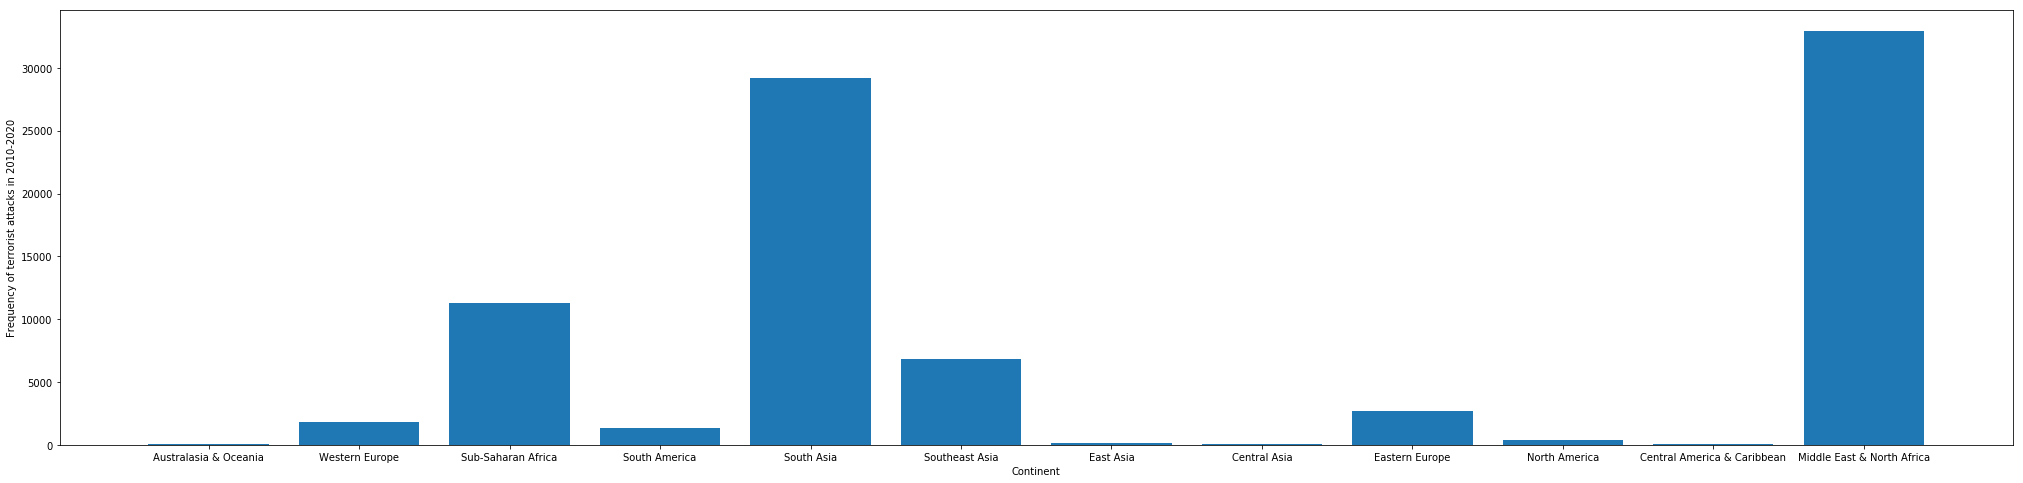

In [9]:
plt.rcParams["figure.figsize"]=[35,8]
plt.bar(*zip(*crime_continent.items()))
plt.xlabel("Continent")
plt.ylabel("Frequency of terrorist attacks in 2010-2020")
plt.show()


* The Middle East and North Africa region experienced the number of terrorist attacks in 2010-2020.

# 3) Generating Word Clouds 

## For Summary

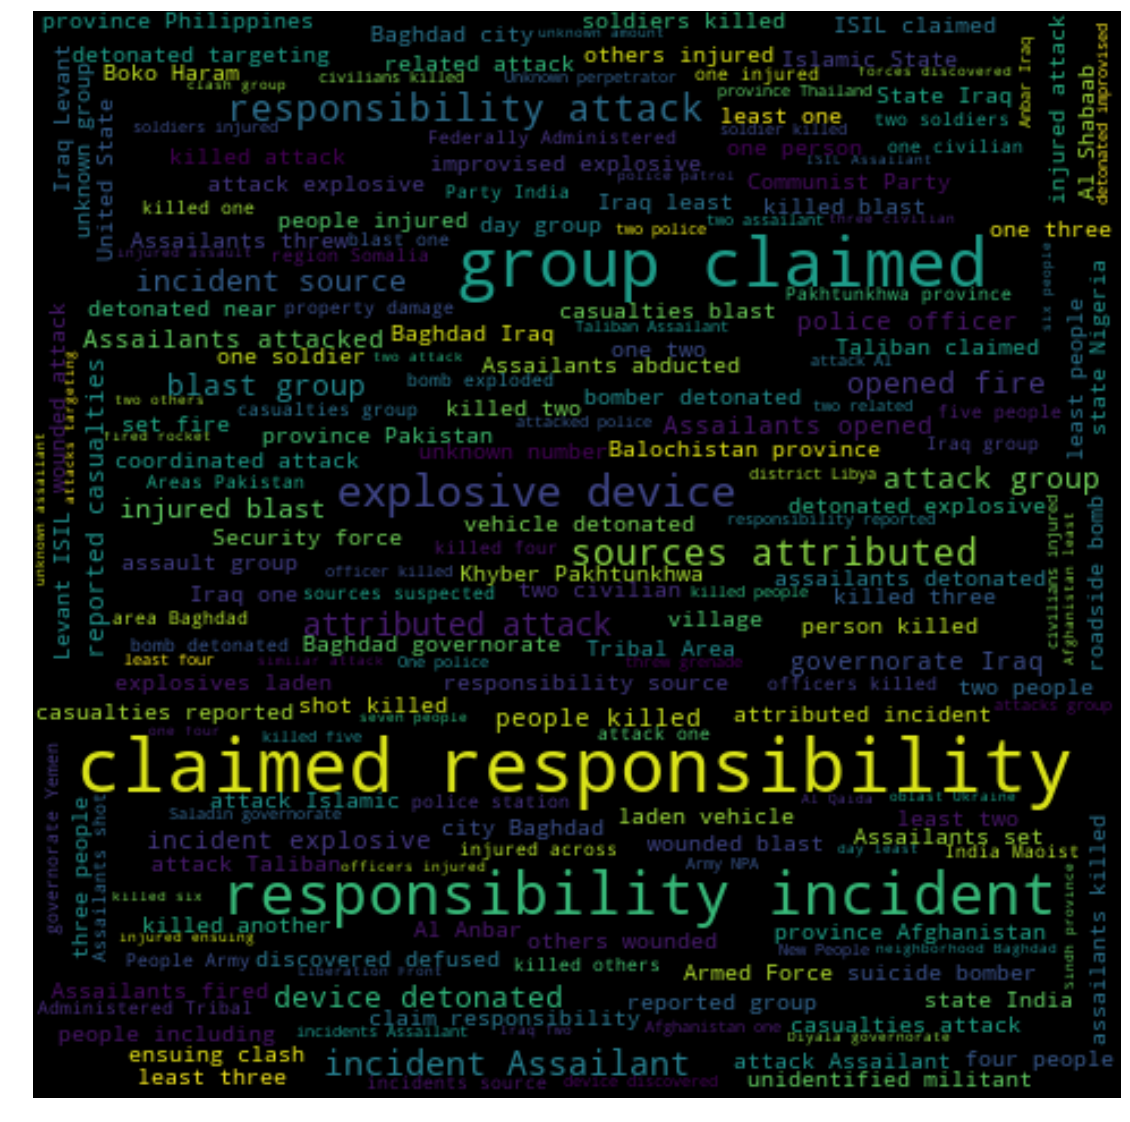

In [28]:
stopwords = set(STOPWORDS)
total_words = []
for index, row in data.iterrows():
    summary = row['summary']
    try:
        curr_word = ' '.join(summary.split(":")[1:])
        total_words += curr_word.split()
    except:
        pass
total_words = ' '.join(total_words)

wordcloud = WordCloud(width=480, height=480, 
            stopwords=stopwords).generate(total_words) 

plt.figure(figsize=(20,20)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show()

## For Motive

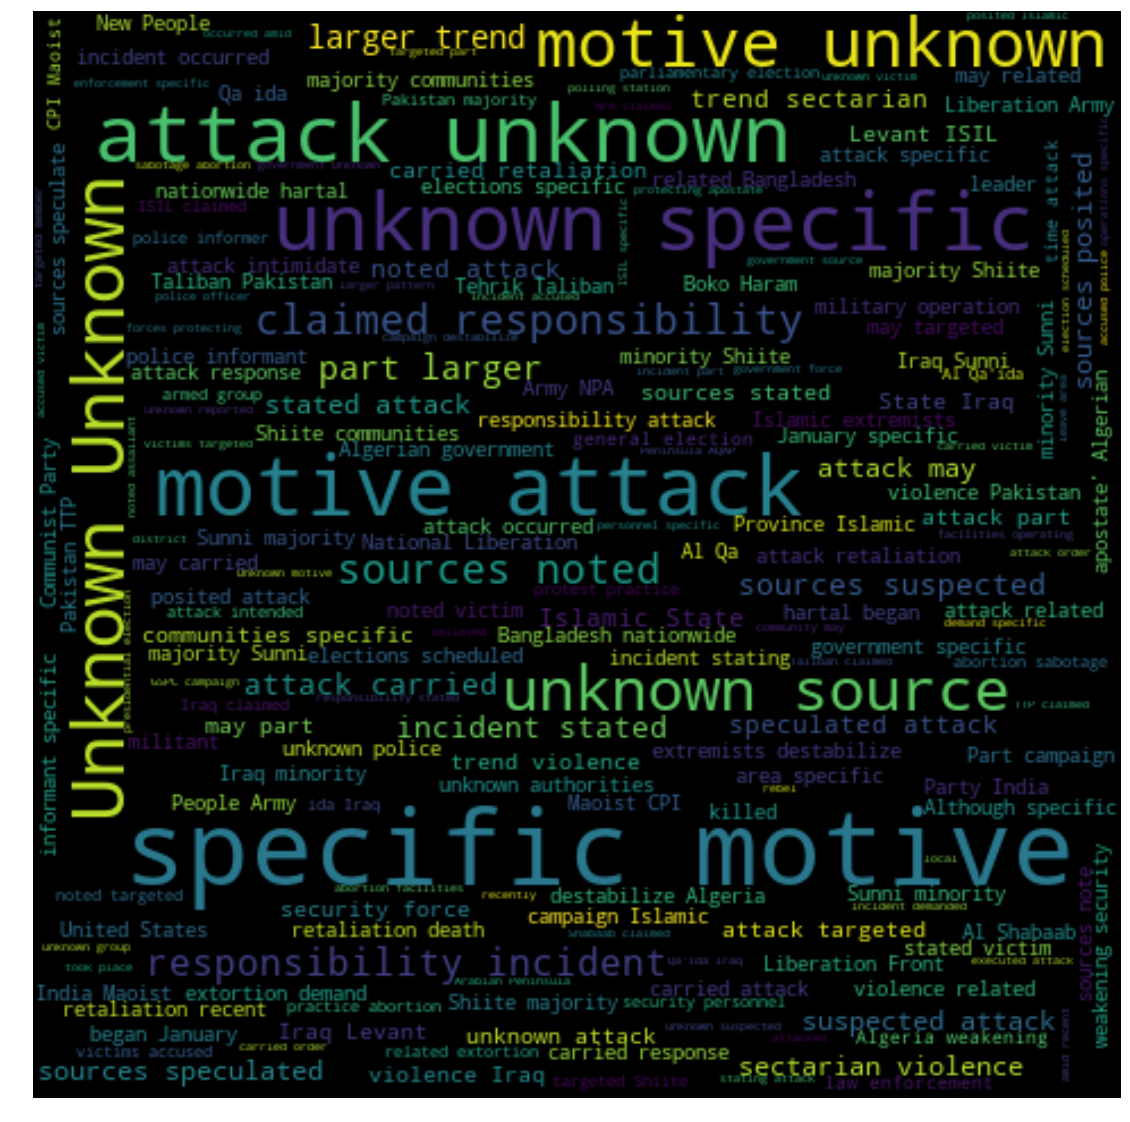

In [29]:
total_words=[]
for index, row in data.iterrows():
    motive = row['motive']
    try:
        total_words += motive.split()
    except:
        pass
total_words = ' '.join(total_words)

wordcloud = WordCloud(width=480, height=480, 
            stopwords=stopwords,).generate(total_words) 

plt.figure(figsize=(20,20)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show()

In [ ]:
**

# 4) Undirected Graph

In [87]:
G=nx.DiGraph()

In [91]:
for index, row in data.iterrows():
    source=int(row['eventid'])
    
    related=row['related']
    if type(related) !=float:
        G.add_node(source)
        try: 
            related=related.split(' ')
            for edge in range(len(related)):
                related[edge]=int(related[edge].strip(','))
                G.add_node(related[edge])
                G.add_edge(source,related[edge])
        except:
            related=[]
        try:
            related=related.split(',')
            for edge in range(len(related)):
                related[edge]=int(related[edge].strip(' '))
                G.add_node(related[edge])
                G.add_edge(source,related[edge])
        except:
            related=[]




In [92]:
scc=list(nx.strongly_connected_components(G))

In [96]:
print("Total no of coordianted Terror attack = " + str(len(scc)))

Total no of coordianted Terror attack = 7531


In [99]:
largest_set=-100
for terror_set in scc:
    largest_set=max(largest_set,len(terror_set))
print("Largest set of coordinated Terror attack = "+ str(largest_set))

Largest set of coordinated Terror attack = 80
